##  Keşifsel Veri Analizi -  Exploratory Data Analysis EDA 
#### İçerik:
###### - [Keşifsel Veri Analizine Giriş](](######giris)
###### - [Python'da EDA'nın Temelleri](](######eda-basics)
###### - [Veri Desenlerini ve İlişkilerini Keşfetme](](](######eda-explore)
###### - [Veri Temizleme ve Ön İşleme]( ](###### on-isleme)
###### -  [Gelişmiş Görüntüleme Teknikleri](](###### gelismis-goruntuleme)
###### - [Bulguları](###### bulgular)

## Veri seti detayları

- Gender: Yolcunun erkek mi yoksa kadın mı olduğunu belirtir
- Customer Type: Yolcunun düzenli veya düzenli olmayan bir havayolu müşterisi olup olmadığını tanımlar.
- Age: Yolcunun yaşını ifade eder: Yolcunun gerçek yaşını ifade eder.
- Type of Travel: Kişisel ve iş seyahati arasında ayrım yaparak yolcunun uçuş amacını belirtir.
- Class: Yolcuları business, ekonomi veya ekonomi plus sınıfı olarak sınıflandırır.
- Flight Distance: Uçuş mesafesini belirtir.
- Inflight Wi-Fi Service: Yolcuların uçak içi Wi-Fi hizmetinden memnuniyetini 0 (derecelendirilmemiş) ile 5 (en yüksek memnuniyet) arasında ölçer.
- Departure/Arrival Time Convenience: Yolcuların kalkış ve varış saatlerine ilişkin memnuniyetini değerlendirir ve yine 0 ile 5 arasında derecelendirilir.
- Ease of Online Booking: Online rezervasyon sürecinden duyulan memnuniyeti yansıtır ve 0 ile 5 arasında bir ölçekte puanlanır.
- Arrival Delay in Minutes:Varıştaki gecikme süresini belirtir.
- satisfaction: Memnun kaldımı, Memnun kalmadımı 1,0                       

In [1]:
import pandas as pd
data= pd.read_csv("test.csv")
data= data[['Gender','Customer Type','Age','Type of Travel','Class','Flight Distance',
            'Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking',
            'Arrival Delay in Minutes','satisfaction']]

data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,20.0,satisfied


## istenirse sütun isimlerini türkçeye çevirmek


In [2]:
yeni_sutun_isimleri = {
    'Gender': 'Cinsiyet',
    'Customer Type': 'Müşteri Türü',
    'Age': 'Yaş',
    'Type of Travel': 'Seyahat Türü',
    'Class': 'Sınıf',
    'Flight Distance': 'Uçuş Mesafesi',
    'Inflight wifi service': 'Uçak İçi Wi-Fi Hizmeti',
    'Departure/Arrival time convenient': 'Kalkış/Varış Zamanı Uygunluğu',
    'Ease of Online booking': 'Online Rezervasyon Kolaylığı',
    'Arrival Delay in Minutes': 'Varış Gecikmesi (Dakika)',
    'satisfaction': 'Memnuniyet'
}

# Sütun isimlerini güncelle
data = data.rename(columns=yeni_sutun_isimleri)
data.head()

,Cinsiyet,Müşteri Türü,Yaş,Seyahat Türü,Sınıf,Uçuş Mesafesi,Uçak İçi Wi-Fi Hizmeti,Kalkış/Varış Zamanı Uygunluğu,Online Rezervasyon Kolaylığı,Varış Gecikmesi (Dakika),Memnuniyet
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,0.0,satisfied


### Veri Tiplerini İnceleme
- info özelliği veri tiplerini ve kaç tane değeri olduğunu gösterir

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Arrival Delay in Minutes           25893 non-null  float64
 10  satisfaction                       25976 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.2+ 

### Eksik Değerleri Belirleme
- Eksik değerler modellerde problem çıkarmaktadır, eksik veriler için bir çözüm uygulanması gerekmektedir.
- isnull() ve sum() fonksiyonları ile eksik veriler tespit edilebilir

In [3]:
data.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [4]:
# Arrival Delay in Minutes te boş değerler bulunmakta bu değerleri veri seti içerisinde gözlemlemek için aşağıdaki fonksiyon kullanılır.


data[data['Arrival Delay in Minutes'].isnull()]


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Arrival Delay in Minutes,satisfaction
516,Female,Loyal Customer,21,Personal Travel,Eco,632,1,5,1,NaN,neutral or dissatisfied
656,Male,Loyal Customer,9,Personal Travel,Eco,762,2,5,2,NaN,neutral or dissatisfied
1071,Male,disloyal Customer,25,Business travel,Eco,1017,3,4,4,NaN,neutral or dissatisfied
1224,Male,Loyal Customer,7,Personal Travel,Eco,399,4,5,4,NaN,neutral or dissatisfied
1589,Female,Loyal Customer,58,Business travel,Eco,129,5,3,3,NaN,satisfied
...,...,...,...,...,...,...,...,...,...,...,...
24072,Male,Loyal Customer,45,Business travel,Eco,352,5,1,1,NaN,satisfied
24133,Female,Loyal Customer,29,Business travel,Business,3873,3,3,3,NaN,neutral or dissatisfied
24301,Male,disloyal Customer,38,Business travel,Business,759,3,3,3,NaN,satisfied
25128,Female,Loyal Customer,52,Business travel,Business,3659,5,5,5,NaN,satisfied


In [5]:
#DataFrame'in istatistiksel özeti
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25893.000000
mean,39.620958,1193.788459,2.724746,3.046812,2.756775,14.740857
std,15.135685,998.683999,1.335384,1.533371,1.412951,37.517539
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,0.000000
50%,40.000000,849.000000,3.000000,3.000000,3.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,1115.000000


In [6]:
#DataFrame'in her sütunundaki benzersiz (unique) değerlerin sayısını döndürür.
data.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3281
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Arrival Delay in Minutes              320
satisfaction                            2
dtype: int64

In [7]:
def data_info(data):
    print('-----------Boyutu---------')
    print(data.shape)

    print('-----Sutün--------------Veri Tipi-------- ')
    print(data.dtypes)

    print('--------Benzersiz Değer--------')
    print(data.nunique())

    print('--------Boş Değer----------')

    print(data.isnull().sum())
    
    print('--------Boş sütun----------')
    boş_sütunlar = data.columns[data.isnull().any()].tolist()
    print(boş_sütunlar)

    
    print('--------Veri Özeti-------')
    print(data.describe(include='all'))
data_info(data)

-----------Boyutu---------
(25976, 11)
-----Sutün--------------Veri Tipi-------- 
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Arrival Delay in Minutes             float64
satisfaction                          object
dtype: object
--------Benzersiz Değer--------
Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3281
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6

## Veri Desenlerini ve İlişkilerini Keşfetme  <a class="anchor" id="eda-explore"></a>



Verinin anlaşılması için içerisindeki sutünların özelliklerini anlaması gerekir. Bu sutün özelliklerine göre analizler yapılmaktadır kategorik ve Numerik özellikte olan sutünların birbirinden farklı analiz methodları vardır hangi analiz metodunu kullanıcağımızı bulmak için sutünların özelliklerini keşfetmeliyiz. 

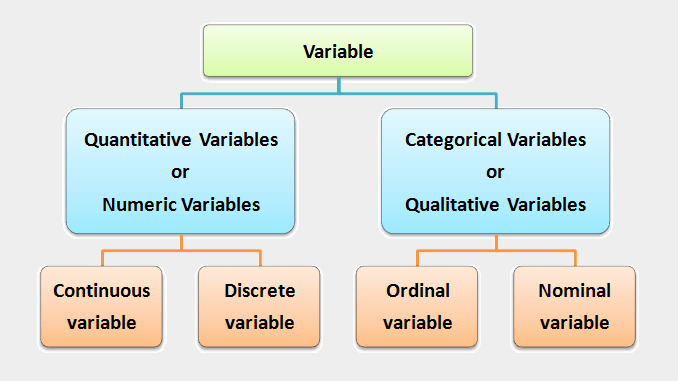

In [8]:
cat_cols = [col for col in data.columns if data[col].dtypes=="O"]
print(cat_cols)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [9]:
num_cols = [col for col in data.columns if data[col].dtypes!="O"]
print(num_cols)

['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Arrival Delay in Minutes']


### Numerik Değişkenlerin Analizi

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
def grafikler(data):
# numeric_columns,verilen DataFrame'in sütunlarını döngüye alır ve dtype != "O" (object olmayan)
# koşulunu kullanarak sayısal sütunları tespit eder
  
    numeric_columns= [col for col in data.columns if data[col].dtype != "O"]
    for i in numeric_columns:
        fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(20,4)) # 3 sütunlu alt grafik oluşturur
        sns.histplot(x=data[i],bins=10,ax=axes[0]) # histogram grafiği oluşturulur ve 
        axes[0].set_title(i) # 0. indexe bu grafik yerleştirilir.

        sns.boxplot(x=data[i],ax=axes[1]) #Kutu grafiği oluşturulur.
        axes[1].set_title(i) # 1. indexe bu grafik yerleştirilir.

        sns.kdeplot(x=data[i],ax=axes[2]) #Yoğunluk grafiği oluşturulur.
        axes[2].set_title(i) # 2. indexe bu grafik yerleştirilir.
        plt.show()
# Butün sayısal değerler için grafikler oluşturularak gösterilir.

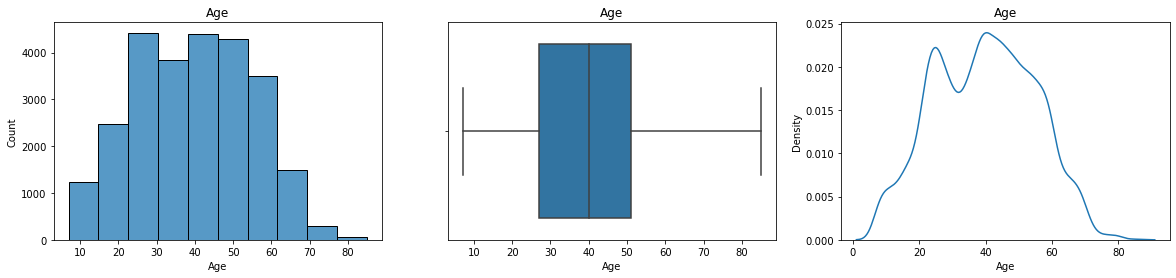

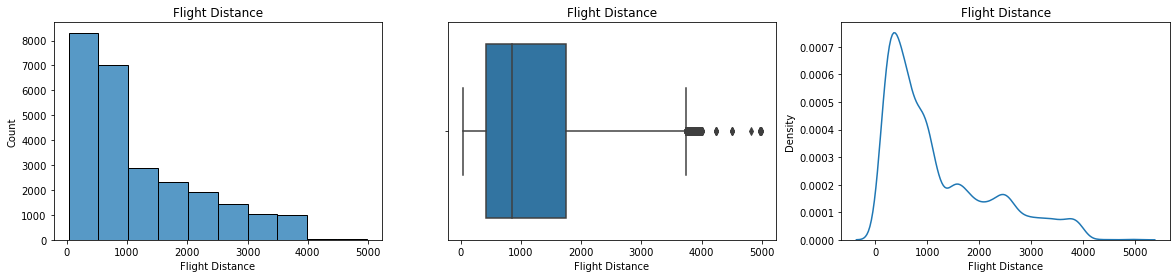

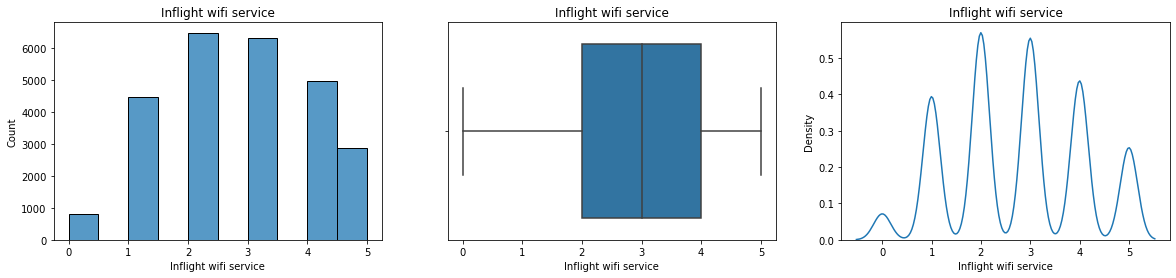

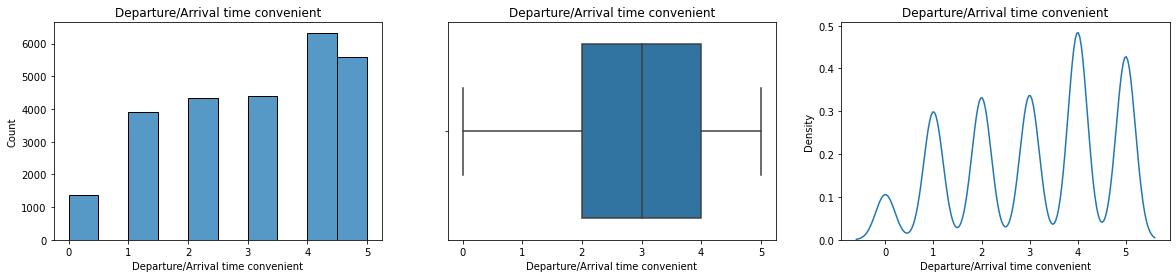

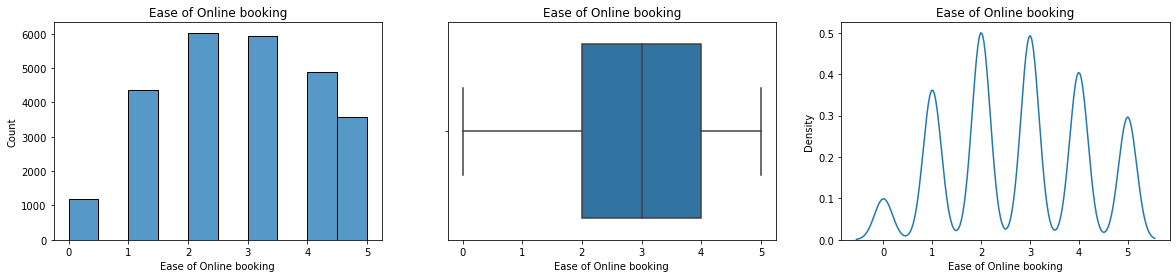

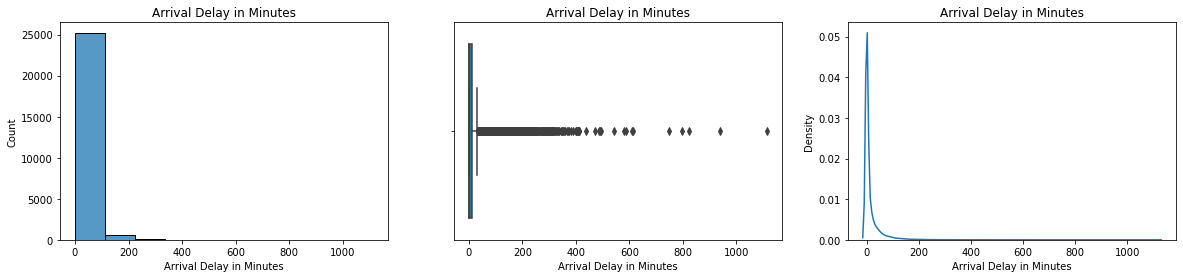

In [11]:
grafikler(data)

### verilerle ilgili olarak

- Arrival Delay in Minutes- yani varış gecikme sutünu dağılımında anormallikler var uç değerler grafiğin aralığını bozduğu gözlenmiştir. 
- Flight Distance- uçuş mesafesinde de uç veriler olabilir gibi

### Kategorik Değişkenlerin Analizi

In [12]:
# satisfaction-Memnuniyet için verileri sayısallaştırmak;
satisfaction_map = {
    'neutral or dissatisfied': 0,
    'satisfied': 1
}
data['Num_satisfaction']= data['satisfaction'].map(satisfaction_map)
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Arrival Delay in Minutes,satisfaction,Num_satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,44.0,satisfied,1
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,0.0,satisfied,1
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,0.0,neutral or dissatisfied,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,6.0,satisfied,1
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,20.0,satisfied,1


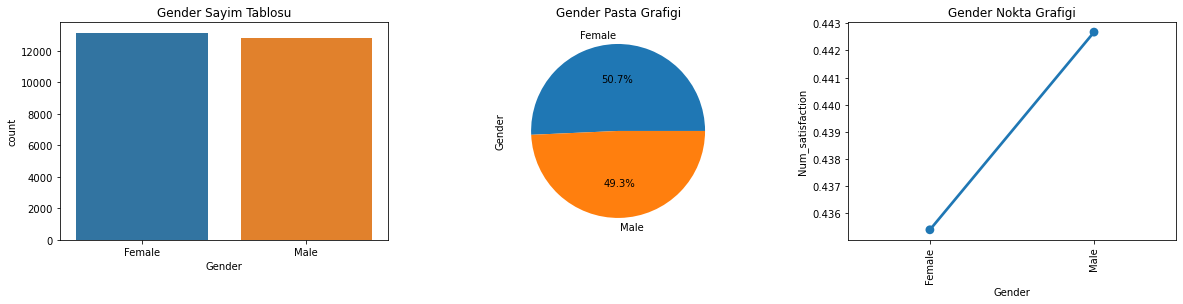

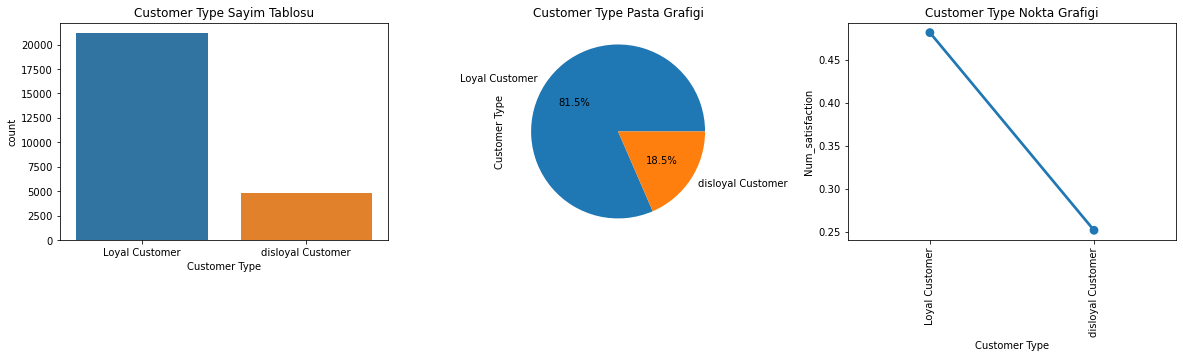

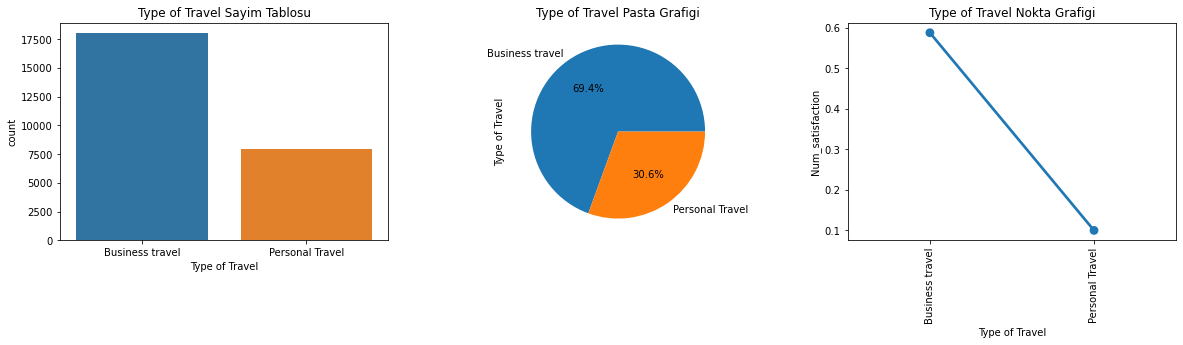

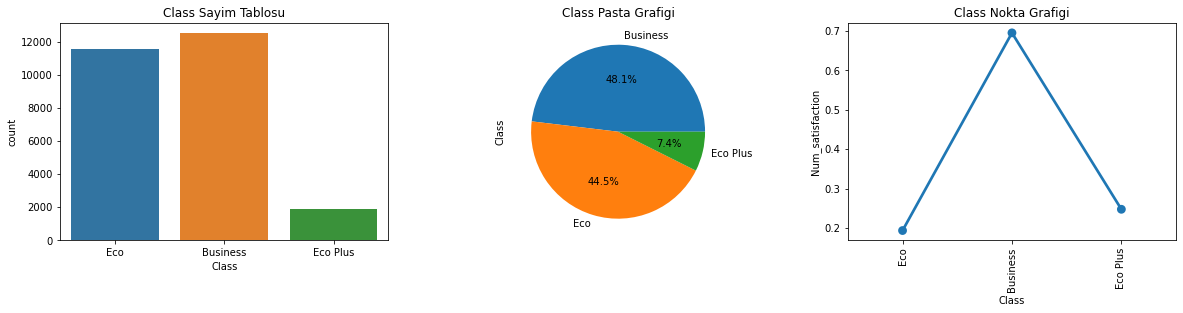

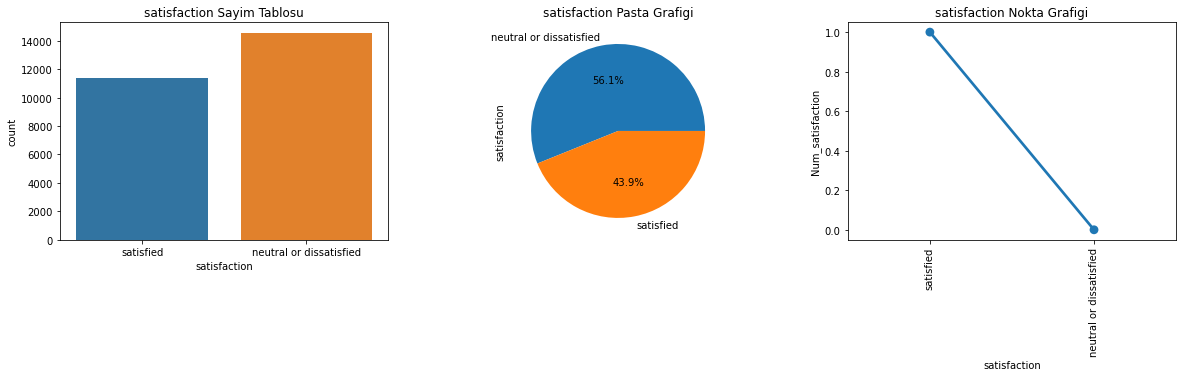

In [14]:
import warnings
warnings.filterwarnings('ignore')

def categorical_charts(data):
    categorical_columns = [col for col in data.columns if data[col].dtype == "O"]
    
    for i in categorical_columns:
        # Sıklık tablosu (bar plot)
        # Bu grafik, kategorik değişkenin frekansını gösterir.
        fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(20,4))        
        sns.countplot(data=data, x=i,ax=axes[0])
        plt.xticks(rotation=90)
        axes[0].set_title(f'{i} Sayim Tablosu')
        
        # Pasta grafiği (pie chart)
        # Bu grafik, kategorik değişkenin dağılımını gösterir.
        data[i].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[1])
        plt.ylabel('')
        axes[1].set_title(f'{i} Pasta Grafigi')
        
        # Nokta grafiği (point plot)
        # Bu grafik, kategorik değişkenin bir sayısal değişkenle ilişkisini gösterir.
        sns.pointplot(data=data, x=i, y='Num_satisfaction', ci=None,ax=axes[2])
        plt.xticks(rotation=90)
        axes[2].set_title(f'{i} Nokta Grafigi')

# Örnek kullanım
categorical_charts(data)  

### İlişki analizi

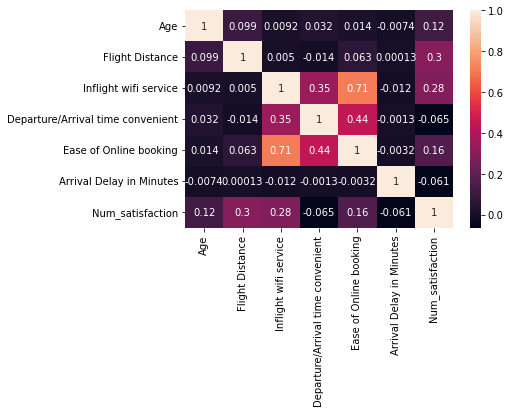

In [16]:
# sadece numerik veriler içerisindeki ilişkilere bakmaktadır.
# karmaşıklık matrisi
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()



## Veri Temizleme ve Ön İşleme <a class="anchor" id="on-isleme"></a>

Veri temizleme ve ön işleme, veri analizi projelerinde çok kritik bir adımdır.

#### Verideki Gürültüyü azaltma: 
Eksik değerler, aykırı değerler, tutarsızlıklar vb. analizi olumsuz etkiler.

#### Veriyi Hazırlama: 
Kategorik değişkenleri Dummy değişkenlere veya encoded hale çevirmek, ölçekleme yapmak, eksik değerleri doldurmak gibi işlemler analize ve makine öğrenimine hazır hale getirir.

#### Model Başarısı: 
Temizlenmemiş veri ile eğitilen modeller kötü sonuçlar verecektir.

#### Anlamlı Analizler: 
Sorunlu veriden doğru tahmin ve öngörüler çıkarmayı zorlaştırır.


Bu sebeplerden dolayı Veri Temizleme ve Ön İşleme basamakları önemlidir.


In [17]:
print(len(data))
data = data.drop_duplicates() #Bu metod,DataFrame içindeki yinelenen (tekrar eden) satırları kaldırmak için kullanılır.
print(len(data))

25976
25953


In [18]:
#Belirlediğimiz metriklere göre olması gereken maximum limit ölçümü
# sütununun belirli yüzdelik dilimlerini kullanarak bir değer aralığı belirlemek
 
Arrive_Q1 = data['Arrival Delay in Minutes'].quantile(0.1) #%10'luk yüzdelik dilim değerini belirler
Arrive_Q3=data['Arrival Delay in Minutes'].quantile(0.9) # %90'luk yüzdelik dilim değerini belirler.

# Q3 ve Q1 arasındaki farkı hesaplar. 
# Bu, çeyrekler arası aralık olarak adlandırılır ve veri setinin ortasındaki 50% değerini kapsayan bir aralıktır.
interquantile_range = Arrive_Q3- Arrive_Q1

# Bu, aykırı değerlerin sınırlarını belirlemek için kullanılır. 
# Q3'ün üzerine 1.5 * IQR (çeyrekler arası aralık) ekleyerek sınırları belirler. 
# Aykırı değerler bu sınırların dışındaki değerlerdir.
maximum_limit= Arrive_Q3 + 1.5 * interquantile_range

In [19]:
Arrive_Q1

0.0

In [20]:
interquantile_range

44.0

In [21]:
Arrive_Q3

44.0

In [22]:
maximum_limit

110.0

In [23]:
# maximum_limit değerinden büyük olan satırları içeren bir DataFrame döndürür.
# veri setindeki varış gecikmesinin belirlenen sınırdan daha büyük olan aykırı değerlerini filtrelemek için kullanılıyor

data[data['Arrival Delay in Minutes'] > maximum_limit]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Arrival Delay in Minutes,satisfaction,Num_satisfaction
13,Female,Loyal Customer,60,Business travel,Business,451,1,1,4,113.0,satisfied,1
42,Male,Loyal Customer,22,Business travel,Business,277,3,3,3,177.0,neutral or dissatisfied,0
106,Male,Loyal Customer,56,Business travel,Business,2556,4,4,4,113.0,satisfied,1
145,Female,Loyal Customer,53,Business travel,Business,3769,3,1,5,178.0,neutral or dissatisfied,0
200,Female,Loyal Customer,39,Personal Travel,Eco,1005,1,4,2,163.0,neutral or dissatisfied,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25697,Female,Loyal Customer,70,Personal Travel,Business,266,1,4,0,143.0,neutral or dissatisfied,0
25757,Female,Loyal Customer,58,Personal Travel,Eco,1133,1,3,1,162.0,neutral or dissatisfied,0
25771,Male,disloyal Customer,44,Business travel,Business,331,2,2,2,288.0,neutral or dissatisfied,0
25904,Female,Loyal Customer,49,Business travel,Business,3542,3,3,3,169.0,satisfied,1


In [24]:
# maximum_limit değerinden küçük olan satırları içeren bir DataFrame'i seçer. 
# Ardından, indeksleri sıfırlayan bir yeniden indeksleme işlemi yapar.

#  Bu işlem, belirli bir sınırın altındaki gecikme sürelerine sahip olan verilerin seçilmesi ve indekslerin sıfırlanması için kullanılır.

data =data[data['Arrival Delay in Minutes'] < maximum_limit].reset_index()
data.head()

,index,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Arrival Delay in Minutes,satisfaction,Num_satisfaction
0,0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,44.0,satisfied,1
1,1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,0.0,satisfied,1
2,2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,0.0,neutral or dissatisfied,0
3,3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,6.0,satisfied,1
4,4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,20.0,satisfied,1


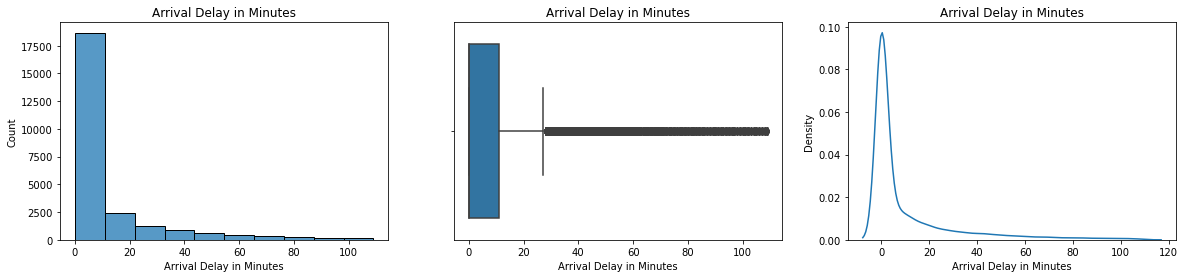

In [25]:
# üç farklı grafikle değerleri gözlemlemek;

i='Arrival Delay in Minutes'
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(20,4))
sns.histplot(x=data[i],bins=10,ax=axes[0])
axes[0].set_title(i)

sns.boxplot(x=data[i],ax=axes[1])
axes[1].set_title(i)

sns.kdeplot(x=data[i],ax=axes[2])
axes[2].set_title(i)
plt.show()

In [26]:
import numpy as np

# uçuş süresini logaritmik değere dönüştürme;
# Logaritma alma işlemi genellikle verilerin dağılımını dengeler veya görselleştirme veya modelleme için daha uygun hale getirir. 
data['Log Flight Distance'] = np.log(data['Flight Distance'])
data.head()

,index,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Arrival Delay in Minutes,satisfaction,Num_satisfaction,Log Flight Distance
0,0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,44.0,satisfied,1,5.075174
1,1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,0.0,satisfied,1,7.959625
2,2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,0.0,neutral or dissatisfied,0,5.257495
3,3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,6.0,satisfied,1,8.124743
4,4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,20.0,satisfied,1,7.074963


uzun mesafeli uçuşlar- 'Flight Distance' gibi değişkenler, genellikle büyük aralıklı değerlere sahip olabilir. Bu durum, modelleme veya analizde dengesizliklere veya çarpıklıklara neden olabilir. Logaritmik dönüşüm bu tür durumlarda veriyi daha simetrik veya daha dengeli bir dağılıma getirebilir.

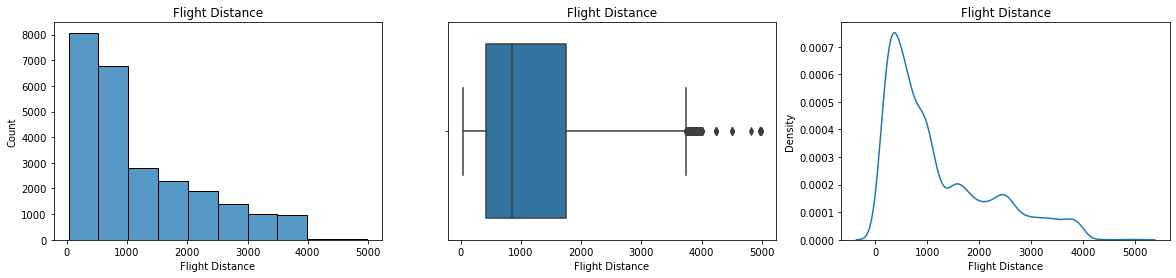

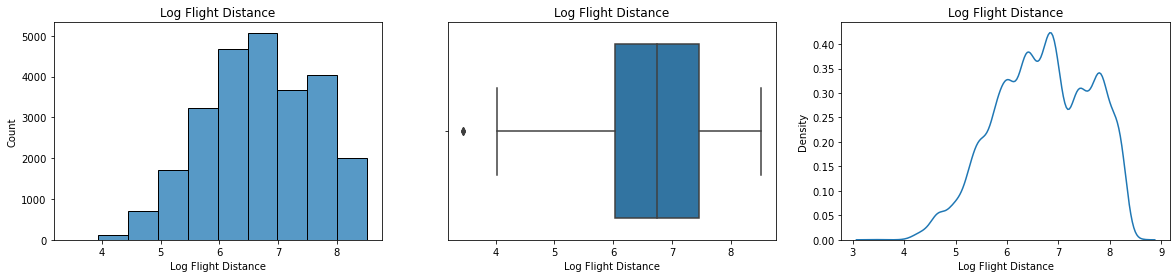

In [27]:
for i in ['Flight Distance','Log Flight Distance']:
    fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(20,4))
    sns.histplot(x=data[i],bins=10,ax=axes[0])
    axes[0].set_title(i)

    sns.boxplot(x=data[i],ax=axes[1])
    axes[1].set_title(i)

    sns.kdeplot(x=data[i],ax=axes[2])
    axes[2].set_title(i)
    plt.show()

In [35]:
def cat_encode(data):
    encoder = OneHotEncoder(sparse=False)

    cat_cols = [col for col in data.columns if data[col].dtypes == "O"]
    
    for col in cat_cols:
        if data[col].nunique() > 2:
            # One-Hot Encoding kullanırken sadece belirli sütunu dönüştür
            encoded_data = encoder.fit_transform(data[[col]])
            # Dönüştürülmüş veriyi yeni bir DataFrame'e ekle
            encoded_df = pd.DataFrame(encoded_data)
            # Manually create column names
            column_name = [col + '_' + str(i) for i in range(encoded_df.shape[1])]
            encoded_df.columns = column_name
            # Orijinal sütunu çıkarın
            data = data.drop(columns=[col])
            # Yeni dönüştürülmüş sütunu ekleyin
            data = pd.concat([data, encoded_df], axis=1)
        else:
            # 2 veya daha az benzersiz değere sahipse Dummy Variables kullan
            data = pd.get_dummies(data, columns=[col], drop_first=True)

    return data

In [36]:
encode_data=cat_encode(data)
encode_data= encode_data.drop(['Num_satisfaction','index'],axis=1)
encode_data

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Arrival Delay in Minutes,Log Flight Distance,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_0,Class_1,Class_2,satisfaction_satisfied
0,52,160,5,4,3,44.0,5.075174,0,0,0,0.0,1.0,0.0,1
1,36,2863,1,1,3,0.0,7.959625,0,0,0,1.0,0.0,0.0,1
2,20,192,2,0,2,0.0,5.257495,1,1,0,0.0,1.0,0.0,0
3,44,3377,0,0,0,6.0,8.124743,1,0,0,1.0,0.0,0.0,1
4,49,1182,2,3,4,20.0,7.074963,0,0,0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25183,34,526,3,3,3,0.0,6.265301,1,1,0,1.0,0.0,0.0,0
25184,23,646,4,4,4,0.0,6.470800,1,0,0,1.0,0.0,0.0,1
25185,17,828,2,5,1,0.0,6.719013,0,0,1,0.0,1.0,0.0,0
25186,14,1127,3,3,3,0.0,7.027315,1,0,0,1.0,0.0,0.0,1


## Gelişmiş Görüntüleme Teknikleri  <a class="anchor" id="gelismis-goruntuleme"></a>


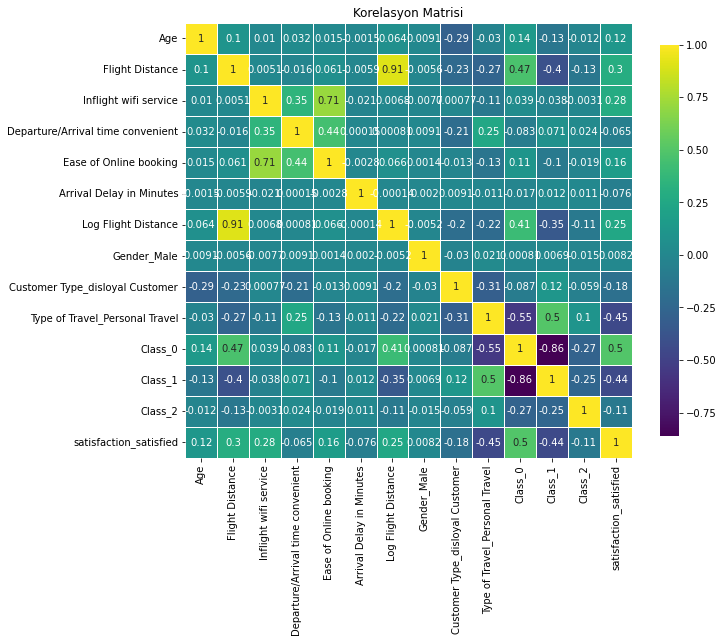

In [38]:
corr_matrix = encode_data.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='viridis',linewidths=.5,cbar_kws={"shrink": .9})
plt.title("Korelasyon Matrisi")
plt.show()

In [39]:
# satisfaction_satisfied sütunu ile diğer sütunlar arasındaki korelasyonları hesaplamak ve bu
# korelasyonları büyükten küçüğe sıralamak için;

# "result" sütunu ile diğer sütunların korelasyonlarını alır ve mutlak değerlerini hesaplar.
# negatif ve pozitif korelasyonları aynı değer olarak ele almamızı sağlar.
result_corr = corr_matrix["satisfaction_satisfied"].abs()

# Korelasyonları büyükten küçüğe sıralama;
sorted_result_corr = result_corr.sort_values(ascending=False)

# En yüksek 10 ilişki
top_5_corr_abs = sorted_result_corr[1:6]  # "result" sütunu kendisiyle ilişkili olduğu için 1'den başlanır
corr_matrix["satisfaction_satisfied"][top_5_corr_abs.index]
# Sonuçları yazdır
print(corr_matrix["satisfaction_satisfied"][top_5_corr_abs.index])


#Bu korelasyonlar, bu sütunlar arasındaki ilişkilerin gücünü gösterir.

Class_0                           0.497848
Type of Travel_Personal Travel   -0.453698
Class_1                          -0.443232
Flight Distance                   0.296332
Inflight wifi service             0.278153
Name: satisfaction_satisfied, dtype: float64


In [40]:
# DataFrame içindeki belirli sütunlarla hedef sütun arasındaki ilişkiyi görselleştirmek
def top_correlation(data: pd.DataFrame,col_names: list,target:str):
    for col in col_names:
# Sütundaki benzersiz değer sayısı 100'den az ise (genellikle kategorik veya düşük sayıda benzersiz değer içeren sütunlar için):
        if data[col].nunique()<100:
# Sütundaki minimum ve maksimum değerler alınarak, grafikte x-ekseni için aralık belirlenir.
            mini=int(data[col].min())
            maxi= int(data[col].max())+1
# Seaborn stilini 'darkgrid' olarak ayarlar, grafiğin arka plan rengi beyaz yapılır
            with sns.axes_style('darkgrid'):
# kategorik bir grafik oluşturulur. Sütun verisi x-eksenine, hedef değişken ise hue (renk) parametresi olarak atanır. Grafik türü 'count' olarak belirlenir.
                g = sns.catplot(x=col, data=data, aspect=4.0, kind='count', hue=target, order=range(mini, maxi),color=np.random.rand(4,))
#     aspect=4.0: Grafik boyut oranı ayarlanır, color=np.random.rand(4,): Grafik renkleri rastgele atanır. 
                g.set_ylabels(f'{col} vs Passenger Satisfaction') #Y-ekseni etiketleri ayarlanır.


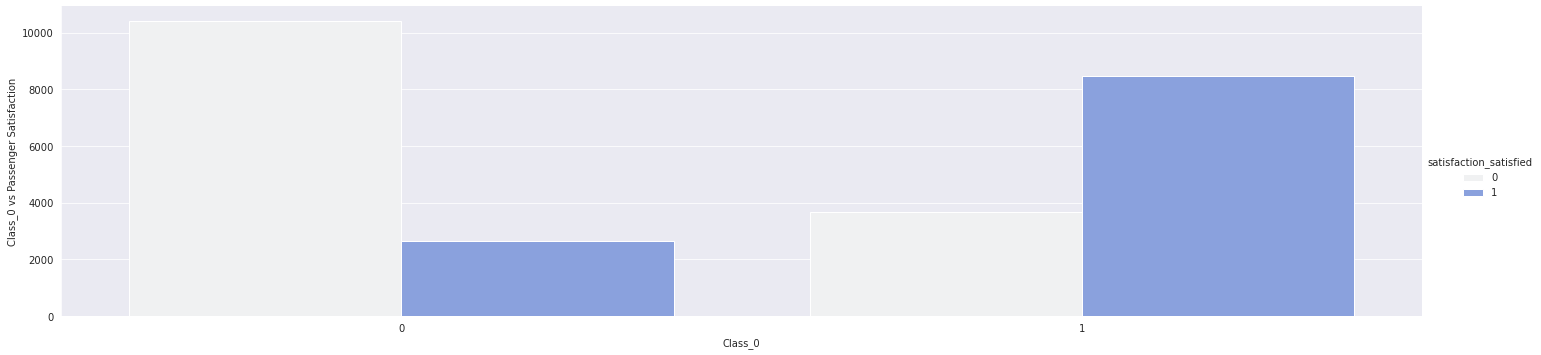

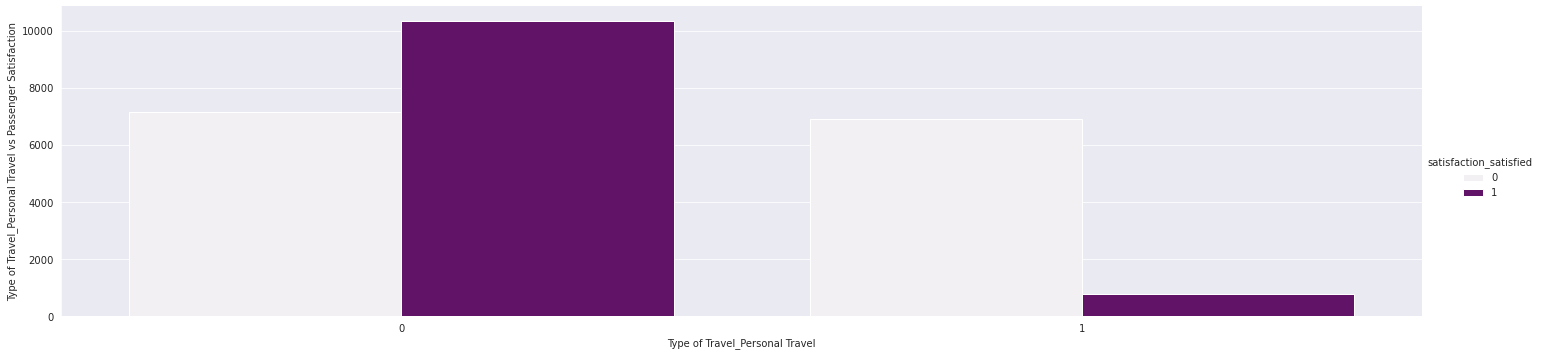

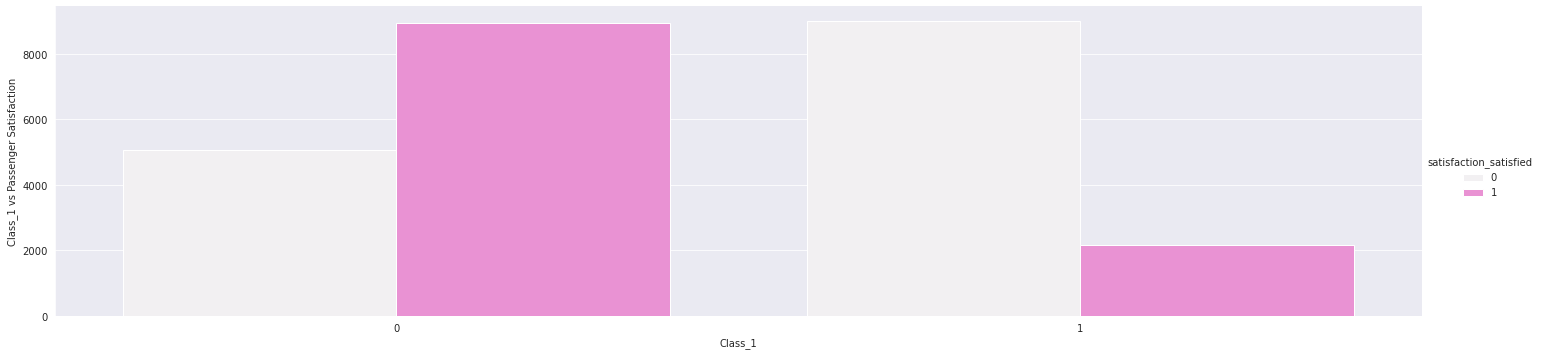

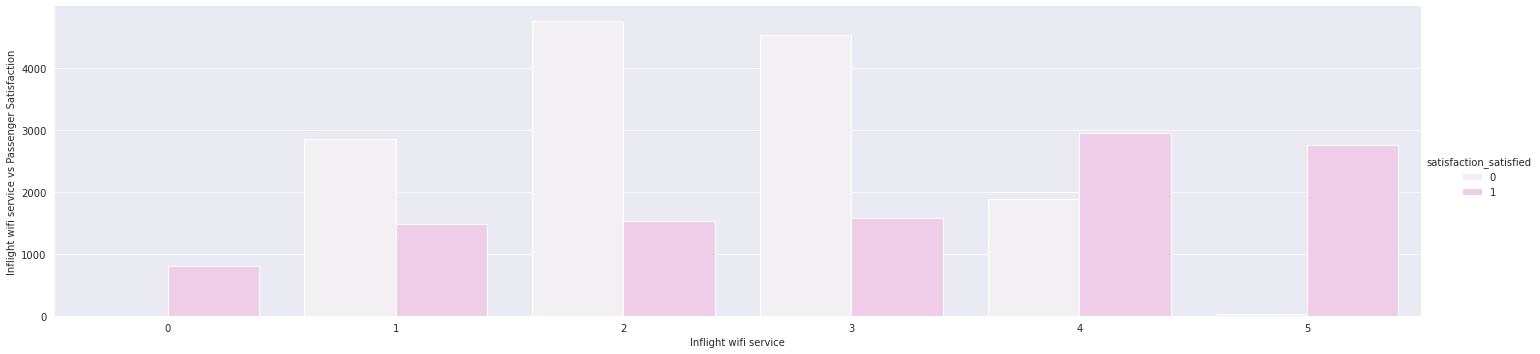

In [41]:
column_list=corr_matrix["satisfaction_satisfied"][top_5_corr_abs.index].index.values
top_correlation(encode_data,column_list,'satisfaction_satisfied')

## Bulgular <a class="anchor" id="bulgular"></a>
#### Kopya veri kontrolü yapıldı
#### Boş değerler tespit edildi ve çözüldü
#### Outlier değerler tespit edildi ve çözüldü
#### Veriler Kategorik ve Numerik olarak ayrıldı
#### Kategorik değişkenler için keşifsel veri analiz yapıldı değer sayısı incelendi
#### Numerik değişkenler için  keşifsel veri analiz yapıldı dağılımı incelendi
#### Makine öğrenimi modeli oluşturmak için veriler encode edildi 